In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense

Using TensorFlow backend.


In [2]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)

print(X)
print('-'*20)
print(y)

[[10 20 30]
 [20 30 40]
 [30 40 50]
 [40 50 60]
 [50 60 70]
 [60 70 80]]
--------------------
[40 50 60 70 80 90]


In [4]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(6, 3, 1)

In [5]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, epochs=200, verbose=0)

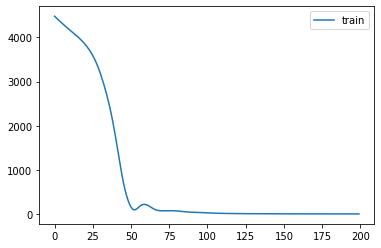

In [7]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [8]:
# demonstrate prediction
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[102.07034]]


In [9]:
from statsmodels.tsa.ar_model import AR
ar_model = AR(raw_seq).fit(maxlag=2)
yhat_ar = ar_model.predict(start=len(raw_seq), end=len(raw_seq)+1)
yhat_ar

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarnin

array([100., 110.])

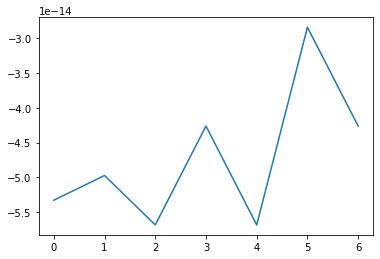

In [10]:
plt.plot(ar_model.resid)
plt.show()

# 单维多步

In [11]:
raw_seq

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [12]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps, n_feature=1):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-n_feature:
            break
        # gather input and output parts of the pattern
        seq_x = sequence[i:end_ix]
        seq_y = sequence[end_ix:end_ix+n_feature]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [13]:
n_steps = 3
n_features = 2

# split into samples
X, y = split_sequence(raw_seq, n_steps, n_features)

In [14]:
X

array([[10, 20, 30],
       [20, 30, 40],
       [30, 40, 50],
       [40, 50, 60],
       [50, 60, 70]])

In [15]:
y

array([[40, 50],
       [50, 60],
       [60, 70],
       [70, 80],
       [80, 90]])

In [16]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(5, 3, 1)

In [17]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 10,502
Trainable params: 10,502
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, epochs=200, verbose=0)

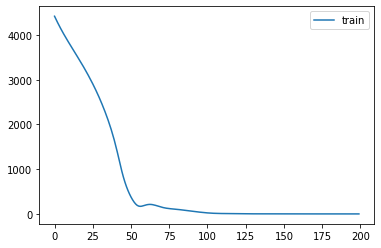

In [19]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [20]:
# demonstrate prediction
x_input = np.array([[70, 80, 90], [80, 90, 100]])
x_input = x_input.reshape((2, n_steps, 1))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[102.9935   111.98527 ]
 [114.90875  123.518555]]


# 多维多步

In [46]:
multi_seq = np.array([[10, 20, 30, 40, 50, 60, 70, 80, 90],
                      [160, 150, 150, 120, 100, 90, 70, 50, 50]])

In [28]:
# [samples, timesteps, features]

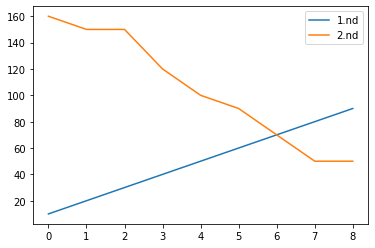

In [22]:
plt.plot(multi_seq[0], label='1.nd')
plt.plot(multi_seq[1], label='2.nd')
plt.legend()
plt.show()

In [52]:
in_seq1 = multi_seq[0].reshape((len(multi_seq[0]), 1))
in_seq2 = multi_seq[1].reshape((len(multi_seq[1]), 1))

In [53]:
data = np.hstack((in_seq1, in_seq2))
data

array([[ 10, 160],
       [ 20, 150],
       [ 30, 150],
       [ 40, 120],
       [ 50, 100],
       [ 60,  90],
       [ 70,  70],
       [ 80,  50],
       [ 90,  50]])

In [81]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out=1, n_feature=1):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        # check if we are beyond the sequence
        if end_ix > len(sequence)-n_steps_out:
            break
        # gather input and output parts of the pattern
        seq_x = sequence[i:end_ix]
        seq_y = sequence[end_ix:end_ix+n_steps_out]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [82]:
n_steps_in = 3
n_step_out = 2

In [83]:
X, y = split_sequence(data, n_steps_in, n_step_out)
X

array([[[ 10, 160],
        [ 20, 150],
        [ 30, 150]],

       [[ 20, 150],
        [ 30, 150],
        [ 40, 120]],

       [[ 30, 150],
        [ 40, 120],
        [ 50, 100]],

       [[ 40, 120],
        [ 50, 100],
        [ 60,  90]],

       [[ 50, 100],
        [ 60,  90],
        [ 70,  70]]])

In [84]:
y

array([[[ 40, 120],
        [ 50, 100]],

       [[ 50, 100],
        [ 60,  90]],

       [[ 60,  90],
        [ 70,  70]],

       [[ 70,  70],
        [ 80,  50]],

       [[ 80,  50],
        [ 90,  50]]])

In [85]:
X.shape

(5, 3, 2)

In [86]:
y.shape

(5, 2, 2)

In [87]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps_in, 2)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(2)))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 50)                10600     
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 2, 50)             0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 2, 200)            200800    
_________________________________________________________________
time_distributed_5 (TimeDist (None, 2, 2)              402       
Total params: 211,802
Trainable params: 211,802
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 1.7334e-08
Epoch 2/200
1/1 [==============================] - 0s 979us/step - loss: 33.8533
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 3.0422
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 12.7733
Epoch 5/200
1/1 [==============================] - 0s 1ms/step - loss: 16.8674
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 8.9697
Epoch 7/200
1/1 [==============================] - 0s 992us/step - loss: 3.5917
Epoch 8/200
1/1 [==============================] - 0s 1ms/step - loss: 5.6924
Epoch 9/200
1/1 [==============================] - 0s 778us/step - loss: 8.6784
Epoch 10/200
1/1 [==============================] - 0s 1ms/step - loss: 7.4569
Epoch 11/200
1/1 [==============================] - 0s 2ms/step - loss: 3.7094
Epoch 12/200
1/1 [==============================] - 0s 1ms/step - loss: 1.4102
Epoch 13/200
1/1 [==============================

1/1 [==============================] - 0s 1ms/step - loss: 6.8522e-05
Epoch 104/200
1/1 [==============================] - 0s 2ms/step - loss: 2.4970e-04
Epoch 105/200
1/1 [==============================] - 0s 1ms/step - loss: 5.7439e-04
Epoch 106/200
1/1 [==============================] - 0s 2ms/step - loss: 4.4912e-04
Epoch 107/200
1/1 [==============================] - 0s 6ms/step - loss: 1.3185e-04
Epoch 108/200
1/1 [==============================] - 0s 5ms/step - loss: 1.3238e-04
Epoch 109/200
1/1 [==============================] - 0s 3ms/step - loss: 2.8797e-04
Epoch 110/200
1/1 [==============================] - 0s 3ms/step - loss: 2.5687e-04
Epoch 111/200
1/1 [==============================] - 0s 4ms/step - loss: 1.2793e-04
Epoch 112/200
1/1 [==============================] - 0s 2ms/step - loss: 1.5859e-04
Epoch 113/200
1/1 [==============================] - ETA: 0s - loss: 2.1728e-0 - 0s 3ms/step - loss: 2.1728e-04
Epoch 114/200
1/1 [==============================] - 0s 6ms/st

1/1 [==============================] - 0s 2ms/step - loss: 3.0686e-08


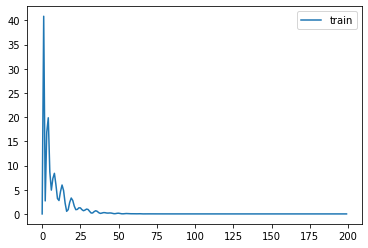

In [90]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [95]:
# [samples, timesteps, features]
x_input = np.array(
    [[ 70, 70],
     [ 80, 50],
     [ 90, 50]]
)
x_input = x_input.reshape((1, n_steps_in, 2))
x_input

array([[[70, 70],
        [80, 50],
        [90, 50]]])

In [96]:
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[[ 93.09968   45.138393]
  [107.32533   42.647102]]]
